# Day 10 - Statistical Tests

## Importing Libraries

In [ ]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


## Shapiro Wilk Test

## Tests whether a data sample has a Gaussian Distribution
### Assumptions
1. Observations in each smple are independent and ideally Distributed
2. Interpretation

H0 : Sample has Gaussian Distribution.

H1 : Sample doesnt hav Gaussian Distribution

In [ ]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat,p = shapiro(data)
print('stat', stat)
print('p', p)
if p>0.05:
    print('data is Normally Distributed')
else:
        print('data is not Normally Distributed')

stat 0.8951009511947632
p 0.19340917468070984
data is Normally Distributed


### Dont really need to initialise variables, shapiro test itself gives the values

In [ ]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
shapiro(data)

ShapiroResult(statistic=0.8951009511947632, pvalue=0.19340917468070984)

## Importing titanic data

In [ ]:
boat = sns.load_dataset('titanic')
print(boat.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<AxesSubplot:>

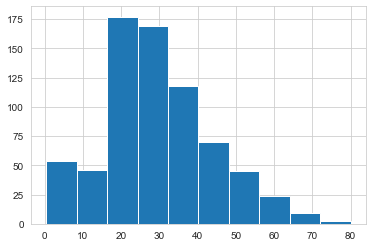

In [ ]:
sns.set_style("whitegrid")
boat['age'].hist()

/Users/asadtariq/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

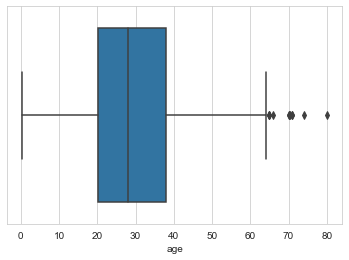

In [ ]:
sns.boxplot(boat['age'])

## Normality test on Age

In [ ]:
from scipy.stats import shapiro
data = boat['age']
stat,p = shapiro(data)
print('stat', stat)
print('p', p)
if p>0.05:
    print('data is Normally Distributed')
else:
        print('data is not Normally Distributed')

stat nan
p 1.0
data is Normally Distributed


## Normality test after dropping NaN

In [ ]:
from scipy.stats import shapiro
boat = boat.dropna()
data = boat['age']
stat,p = shapiro(data)
print('stat', stat)
print('p', p)
if p>0.05:
    print('data is Normally Distributed')
else:
    print('data is not Normally Distributed')

stat 0.9906661510467529
p 0.28414419293403625
data is Normally Distributed


In [ ]:
boat['age'].size

182

<AxesSubplot:>

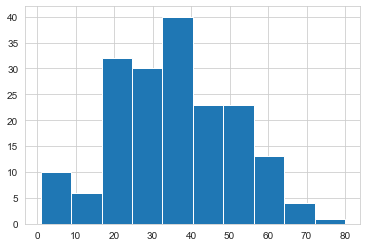

In [ ]:
sns.set_style("whitegrid")
boat['age'].hist()

/Users/asadtariq/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

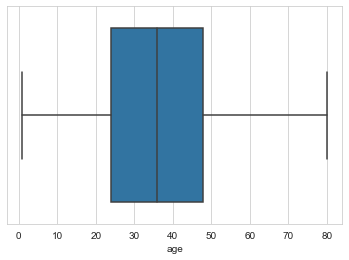

In [ ]:
sns.boxplot(boat['age'])

## Normality test for Fare

In [ ]:
data = boat['fare']
data.max()

512.3292

In [ ]:
from scipy.stats import shapiro
data = boat['fare']
stat,p = shapiro(data)
print('stat', stat)
print('p', p)
if p>0.05:
    print('data is Normally Distributed')
else:
    print('data is not Normally Distributed')

stat 0.7430529594421387
p 1.6486953687823121e-16
data is not Normally Distributed


<AxesSubplot:>

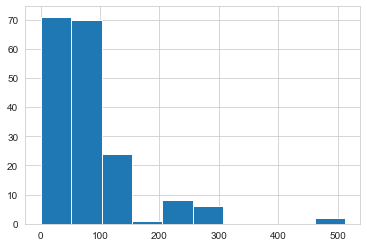

In [ ]:
sns.set_style("whitegrid")
boat['fare'].hist()

/Users/asadtariq/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

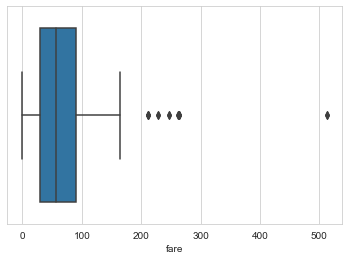

In [ ]:
sns.boxplot(boat['fare'])

## Correlation Test
Tests whether 2 samples have linear relation.

H0 = Independent data
H1 = Dependent data

### Pearson = Normally distributed data ( Parametric ) - Continuous Data
### Spearsman = Non-Normall Distributed ( Non Parametric) - Continuous Data

In [ ]:

# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent ( Correlation Exists)')

stat=0.688, p=0.028
Probably dependent ( Correlation Exists)


In [ ]:

# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
boat = boat.dropna()
data1 = boat['age']
data2 = boat['fare']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent ( Correlation Exists')

stat=-0.091, p=0.223
Probably independent


In [ ]:

# Example of the Spearman's Correlation test
from scipy.stats import spearmanr
boat = boat.dropna()
data1 = boat['age']
data2 = boat['fare']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent ( Correlation Exists')

stat=-0.073, p=0.330
Probably independent


## Chi-Squared test
### Between Categorical values

In [ ]:
# Example of the Chi-Squared  test
from scipy.stats import chi2_contingency
#boat = boat.dropna()
#data1 = boat['age']
#data2 = boat['fare']
table = [[10,20,30],[6,9,17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent ( Correlation Exists')

stat=0.272, p=0.873
Probably independent


In [ ]:
boat = sns.load_dataset('titanic')

boat = boat.dropna()
print(boat.head())
boat['age'].size

    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True  


182

### One hot encoding to encode data in numerical values ( Not required Though )

In [ ]:
# categorical_col = boat[['alive','who']]
# categorical_col.head()
# #example using scikit
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# #apply the one hot encoder
# encoder = OneHotEncoder(categories='auto')
# encoder.fit(categorical_col)
# df4_OneHot = encoder.transform(categorical_col).toarray()
# print('Transformed by One-hot Encoding: ')
# print(df4_OneHot)
# # encode labels with value between 0 and n_classes-1
# encoder = LabelEncoder()
# boat[['alive','who']] = categorical_col.apply(encoder.fit_transform)
# print('Replacing categories by numerical labels: ')
# print(boat[['alive','who']].head())

In [ ]:
# Example of the Chi-Squared  test
from scipy.stats import chi2_contingency
boat = boat.dropna()
data1 = boat['alive']
data2 = boat['who']


In [ ]:
table = pd.crosstab(data1, data2, margins = False)
print(table)

who    child  man  woman
alive                   
no         2   53      4
yes       11   34     78


In [ ]:
# Example of the Chi-Squared  test
from scipy.stats import chi2_contingency
boat = boat.dropna()

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent ( Correlation Exists)')

stat=62.367, p=0.000
Probably dependent ( Correlation Exists)


## Parametric Statistical Hypothesis Tests
1. Student T-test (Tests whether mean of 2 independent samples are significally different)
   
2. Paired Student T-test (Tests whether mean of 2 paired samples are significally different))

In [ ]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same dataset')
else:
  print('Probably different data set')

stat=-0.326, p=0.748
Probably the same dataset


In [ ]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = boat['age']
data2 = boat['fare']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same dataset')
else:
  print('Probably different data set')

stat=-7.481, p=0.000
Probably different data set


In [ ]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same distribution')
else:
  print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


In [ ]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = boat['age']
data2 = boat['fare']
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same distribution')
else:
  print('Probably different distributions')

stat=-7.351, p=0.000
Probably different distributions


## Analyisis of Variance Test - ANOVA
Tests whether means of ***2 or more*** independent samples are significally different

In [ ]:
# Example of ANOVA
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = f_oneway(data1, data2,data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same distribution')
else:
  print('Probably different distributions')

stat=0.085, p=0.919
Probably the same distribution
